# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Normality checks

</font>
</div>

# Why do need a normality test?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An important decision point when working with a sample of data  is whether to use parametric or nonparametric statistical methods.
- **Parametric** statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. 
- If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and **nonparametric** statistical methods must be used.  

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [14]:
from numpy import std
import numpy as np
from numpy import mean
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from IPython.display import Markdown, display
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson

# Create synthetic data
<hr style="border:2px solid black"> </hr>

In [9]:
seed(1)
# Creating a gaussian distribution
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


In [15]:
# NG stands for Non-Gaussian
dataNG = 5 * randn(100) + np.e**randn(100)
print('mean=%.3f stdv=%.3f' % (mean(dataNG), std(dataNG)))

mean=2.489 stdv=7.430


# Histogram plot
<hr style="border:2px solid black"> </hr>

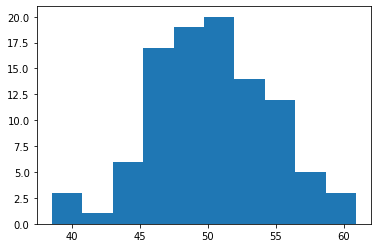

In [3]:
pyplot.hist(data)
pyplot.show()

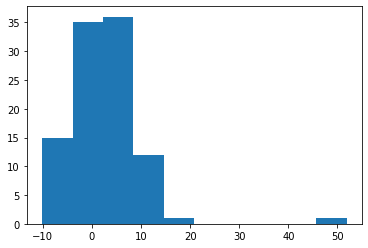

In [16]:
pyplot.hist(dataNG)
pyplot.show()

# QQ plot
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. 
- The idealized samples are divided into groups (e.g. 5), called quantiles. 
- Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution. 
- The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

- **How is this plot used?** Q-Q plots can find Kurtosis (measure of tailedness) of the distribution.

</font>
</div>

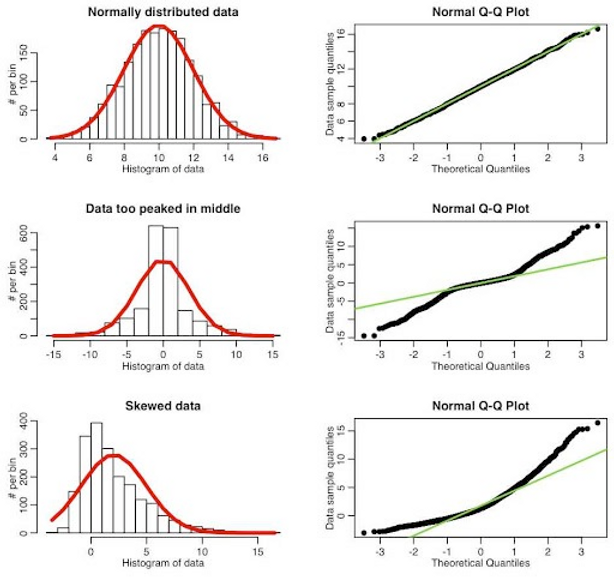

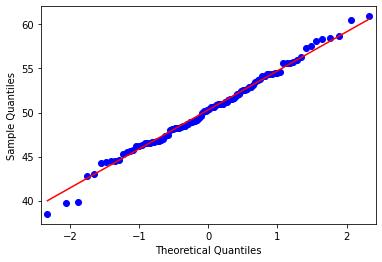

In [4]:
qqplot(data, line = 's')
pyplot.show()

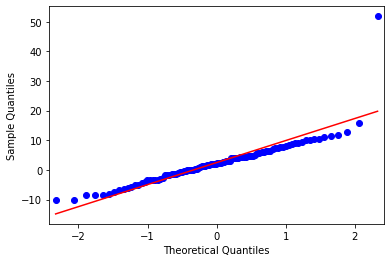

In [17]:
qqplot(dataNG, line = 's')
pyplot.show()

# Shapiro-Wilk test
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.
- It is a **reliable** test of normality,

</font>
</div>

In [5]:
stat, p = shapiro(data) 
print('Statistics=%.3f, p=%.3f' % (stat, p)) # interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does NOT look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [19]:
stat, p = shapiro(dataNG) 
print('Statistics=%.3f, p=%.3f' % (stat, p)) # interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does NOT look Gaussian (reject H0)')

Statistics=0.804, p=0.000
Sample does NOT look Gaussian (reject H0)


# D’Agostino’s K2 Test
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The D’Agostino’s K2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution

</font>
</div>

In [6]:
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) 
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does NOT look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [20]:
stat, p = normaltest(dataNG)
print('Statistics=%.3f, p=%.3f' % (stat, p)) 
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') 
else:
    print('Sample does NOT look Gaussian (reject H0)')

Statistics=92.330, p=0.000
Sample does NOT look Gaussian (reject H0)


# Anderson-Darling Test
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, It can be used to check whether a data sample is normal. 

- The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test. 

- A feature of the  Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough  interpretation of the result.

- Running the example calculates the statistic on the test data set and prints the critical values. Critical values in a statistical test are a range of pre-defined significance boundaries at which  the H0 is failed to be rejected if the calculated statistic is less than the critical value. 

- Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels. 

</font>
</div>

In [7]:
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does NOT look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


In [21]:
result = anderson(dataNG)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does NOT look normal (reject H0)' % (sl, cv))

Statistic: 1.813
15.000: 0.555, data does NOT look normal (reject H0)
10.000: 0.632, data does NOT look normal (reject H0)
5.000: 0.759, data does NOT look normal (reject H0)
2.500: 0.885, data does NOT look normal (reject H0)
1.000: 1.053, data does NOT look normal (reject H0)


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

</font>
</div>